+ Test if the data is normally distributed or not
+ how to handle?
+ p value < alpha
+ normalize data by transformation (log, explanation)

In [224]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -female pip install statsmodels
!{sys.executable} -female pip install wordcloud


# work with df in tabular representation
from datetime import time
import pandas as pd
# round the df in the correlation matrix
import numpy as np
import os
from scipy.stats import t


# Modules for df visualization
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

Unknown option: -f
usage: /Users/tnathu-ai/.conda/envs/Advanced_Programming_for_Data_Science/bin/python [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Unknown option: -f
usage: /Users/tnathu-ai/.conda/envs/Advanced_Programming_for_Data_Science/bin/python [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.


In [225]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.23.1
Pandas version:  1.4.3
Python 3.10.4


In [226]:
# set the general path of the external df
external_df_path = os.path.join(os.path.pardir,'data','interim')

# set the path for specific dfset from external dfset
df = os.path.join(external_df_path, 'cleaned_data.csv')

In [227]:
# import dfset
df = pd.read_csv(df, delimiter=',', skipinitialspace = True)

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number]).columns.to_list()

# select non-numeric columns
df_string = df.select_dtypes(include='string').columns.tolist()


print("Numeric columns: ", df_numeric, "\n")
print("String columns: ", df_string, "\n\n")

# print dfset info
print("The shape and df type of the ORGINAL df:", str(df.info()))

# print first 5 rows
df.head(3)

Numeric columns:  ['athlete_id', 'age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups', 'rank', 'score'] 

String columns:  ['name', 'region', 'team', 'affiliate', 'gender', 'eat', 'train', 'background', 'experience', 'schedule', 'division'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   athlete_id  991 non-null    Int64 
 1   name        991 non-null    string
 2   region      991 non-null    string
 3   team        991 non-null    string
 4   affiliate   991 non-null    string
 5   gender      991 non-null    string
 6   age         991 non-null    Int64 
 7   height      991 non-null    Int64 
 8   weight      991 non-null    Int64 
 9   fran        991 non-null    Int64 
 10  helen       991 non-null    Int64 
 11  grace       991 non-null    Int6

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,division,rank,score
0,2720,justin adams,south central,woodward crossfit,woodward crossfit,male,24,68,180,126,449,86,988,425,58,1302,315,240,475,405,80,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i hav...,i played youth or high school level sports|,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 3+ times a wee...,male,3448,464
1,6922,daniel adamson,south west,crossfit the point,crossfit the point,male,31,67,150,244,486,294,1217,330,63,1268,230,175,410,330,42,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i inc...,i played college sports|,i began crossfit by trying it alone (without a...,i usually only do 1 workout a day|i do multipl...,male,35748,712
2,12563,steven lee adams,mid atlantic,crossfit kaiju,crossfit kaiju,male,37,72,210,162,482,143,1243,366,66,1320,285,205,525,425,49,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i inc...,i played youth or high school level sports|i p...,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 2x a week|i ty...,male,5073,485


<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Basic Statistical Analysis</strong></h1>

* [Histogram](#1)
* [Outliers](#2)
* [Box Plot ](#3)
* [Summary Statistics](#4)
* [CDF](#5)
* [Effect size](#6)
* [Relationship Between Variables](#7)
* [Correlation](#8)
* [Covariance](#9)
* [Pearson Correlation](#10)
* [Spearman's Rank Correlation](#11)
* [Mean VS Median](#12)
* [Hypothesis Testing](#13)
* [Normal(Gaussian) Distribution and z-score](#14)


----------


+ Hypothesis Testing
+ Chi-Squared Tests
+ ANOVA
+ Regression Analysis


In [228]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
athlete_id,991.0,77301.827447,94565.819796,88.0,10446.0,33166.0,112518.0,568157.0
age,991.0,33.147326,6.681385,17.0,28.0,32.0,37.0,54.0
height,991.0,8534.258325,266470.674449,39.0,67.0,70.0,72.0,8388607.0
weight,991.0,180.637740,27.973706,88.0,163.5,183.0,199.5,298.0
fran,991.0,276.001009,374.220295,60.0,168.5,217.0,290.0,5940.0
helen,991.0,582.930373,351.778297,60.0,480.0,530.0,602.0,5940.0
grace,991.0,217.392533,375.440786,30.0,121.0,159.0,214.0,5940.0
filthy50,991.0,1458.544904,532.004458,50.0,1165.0,1359.0,1614.0,5940.0
fgonebad,991.0,436.349142,3167.322549,0.0,298.5,338.0,392.0,100000.0
run400,991.0,109.273461,353.075236,4.0,60.0,67.0,77.0,5940.0


In [229]:
# Number of Unique Athlete
print(df.athlete_id.nunique() == df.shape[0])
# Summary Stats: weight
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["weight"]].T

True


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
weight,991.0,180.63774,27.973706,88.0,117.9,133.0,140.0,156.0,183.0,204.0,215.0,220.0,250.0,298.0


In [230]:
# Groups & Target Summary Stats
df.groupby("gender").weight.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
gender,,,,,
female,178,140.0,140.533708,13.775090,188
male,813,188.0,189.418204,21.976079,298


In [231]:
def visualize_word(col_name):
    text = df[col_name].values
    wordcloud = WordCloud().generate(str(text))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('visualize_word.png')
    plt.show()

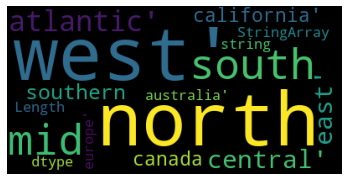

In [232]:
visualize_word('region')

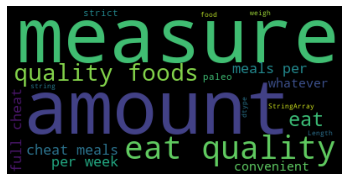

In [233]:
visualize_word('eat')

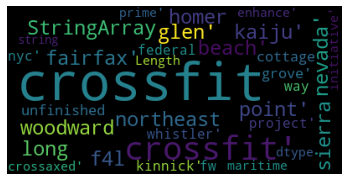

In [234]:
visualize_word('affiliate')

Unlike the normal case, these histograms all differ in shape. In particular, they become progressively less skewed as the sample size n increases.

provide convincing evidence that a sample size of n=30 is sufficient to overcome the skewness of the population distribution and give an approximately normal X sampling distribution.


### RULE OF THUMB
If n>30, the Central Limit Theorem can be used.

Of course, there are exceptions, but this rule applies to most distributions of real data.

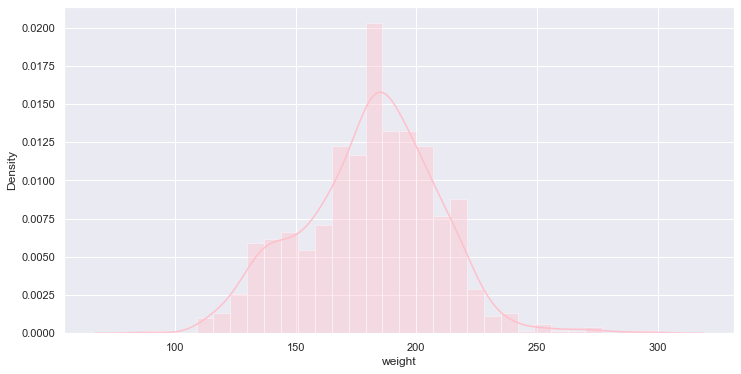

In [235]:
plt.figure(figsize = (12,6))
sns.distplot(df.weight,color = 'pink')
plt.savefig('distplot.png')

In [236]:
import plotly.express as px

df1 = df[['weight','gender']]
fig = px.histogram(df1, x="gender",y="weight",  histfunc='avg')
fig.show()

<a id="7"></a> <br>
# Relationship Between Variables

<a id="8"></a> <br>
## Correlation
* Strength of the relationship between two variables
* Lets look at correlation between all features.

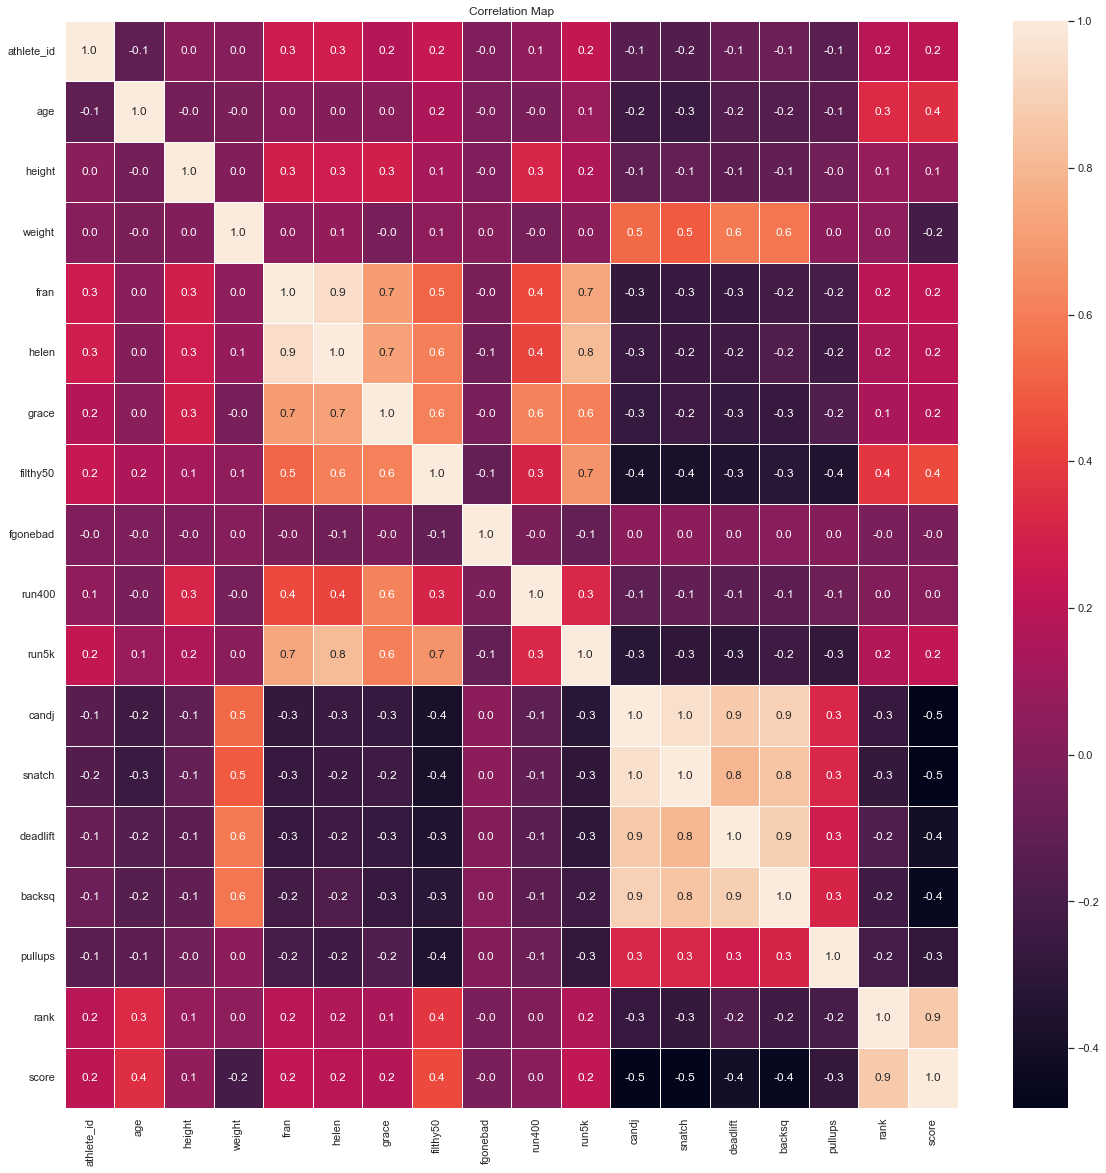

In [237]:
f,ax=plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('heatmap to indicates correlation between variables.png')
plt.show()

In [238]:
#  Groups & Target Summary Stats
df.groupby("gender").weight.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
gender,,,,,
female,178,140.0,140.533708,13.775090,188
male,813,188.0,189.418204,21.976079,298


<a id="1"></a> <br>
# Histogram
* How many times each value appears in dfset. This description is called the distribution of variable
* Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
* Frequency = number of times each value appears

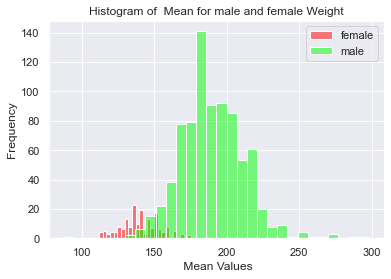

Most frequent female weight mean is:  134.8


In [239]:
female = plt.hist(df[df["gender"] == "female"].weight,bins=30,fc = (1,0,0,0.5),label = "female")
male = plt.hist(df[df["gender"] == "male"].weight,bins=30,fc = (0,1,0,0.5),label = "male")
plt.legend()
plt.xlabel(" Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of  Mean for male and female Weight")
plt.savefig('female_male_weight_hist.png')
plt.show()
frequent_weight_mean = female[0].max()
index_frequent_weight_mean = list(female[0]).index(frequent_weight_mean)
most_frequent_weight_mean = female[1][index_frequent_weight_mean]
print("Most frequent female weight mean is: ",most_frequent_weight_mean)

# ---------
# randomly select a 10 number of rows from a dataframe


In [240]:
df2 = df.sample(n=10, random_state=42)
df2

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,division,rank,score
213,11444,dan juchniewicz,mid atlantic,crossfit rage,crossfit rage,male,26,69,165,268,473,224,1201,315,54,1160,255,216,407,345,0,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|,i played youth or high school level sports|i p...,i began crossfit by trying it alone (without a...,i do multiple workouts in a day 3+ times a wee...,male,14739,573
331,19144,alexander pogrebinsky,north east,crossfit southie,crossfit southie,male,31,70,189,354,625,209,1504,238,90,1500,235,185,455,315,37,i eat 1-3 full cheat meals per week|,i workout mostly at a crossfit affiliate|i rec...,i have no athletic background besides crossfit|,i began crossfit with a coach (e.g. at an affi...,i usually only do 1 workout a day|i typically ...,male,43445,766
501,144032,sheldon johnson,north west,crossfit intensify,crossfit intensify,male,45,72,205,231,212,229,1996,289,63,1459,195,145,325,275,19,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i rec...,i played youth or high school level sports|,i began crossfit with a coach (e.g. at an affi...,decline to answer|,male,43445,766
309,11756,maguid nicholas,canada east,team tidal toronto,tidal crossfit york mills,male,26,71,205,137,434,119,935,458,58,1200,300,255,505,415,50,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i wri...,i have no athletic background besides crossfit|,i began crossfit by trying it alone (without a...,i do multiple workouts in a day 3+ times a wee...,male,1627,429
88,4994,paul delanoy,north east,crossfit virtuosity,crossfit virtuosity,male,32,72,195,159,429,103,1116,416,62,1260,325,250,500,405,56,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i hav...,i played college sports|i regularly play recre...,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 3+ times a wee...,male,256,376
535,110355,keith brown,north east,quincy city crossfit,quincy city crossfit,male,50,72,225,290,614,230,1999,299,90,1810,245,175,405,275,25,i eat whatever is convenient|,i workout mostly at a crossfit affiliate|i hav...,i played college sports|,i have completed the crossfit level 1 certific...,i usually only do 1 workout a day|i typically ...,male,55053,867
280,3233,sam mendes,northern california,diablo crossfit reposado,diablo crossfit,male,28,70,175,178,454,125,1099,392,60,1138,270,215,525,370,50,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|,i played youth or high school level sports|,i have had a life changing experience due to c...,i do multiple workouts in a day 2x a week|i do...,male,31267,683
107,13459,joel eiler,south west,sincity crossfit south,south sincity crossfit,male,38,72,193,182,597,121,1368,320,58,1494,265,200,405,410,50,i eat quality foods but don't measure the amount|,"i workout mostly at home, work, or a tradition...",i played college sports|i regularly play recre...,i began crossfit by trying it alone (without a...,i do multiple workouts in a day 2x a week|i ty...,male,22196,624
59,13465,brian buro,north east,crossfit klew,crossfit klew,male,30,71,180,203,680,170,1392,333,75,1374,215,165,405,290,38,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i wri...,i played youth or high school level sports|,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 3+ times a wee...,male,44814,776
506,119506,knute adcock,mid atlantic,cherry tree choppers,mount vernon crossfit,male,38,69,165,350,695,625,1984,253,67,1453,210,160,385,305,40,i weigh and measure my food|,i workout mostly at a crossfit affiliate|i rec...,i played youth or high school level sports|i p...,i began crossfit with a coa

### How to Plot a t Distribution

You can use the following syntax to plot a t distribution with a specific degrees of freedom:

(array([9.13504864e-04, 1.56600834e-03, 8.48254517e-03, 2.45341306e-02,
        8.78269677e-02, 2.17022656e-01, 3.69316967e-01, 3.38518803e-01,
        1.70303407e-01, 6.12048259e-02, 1.82700973e-02, 4.95902641e-03,
        9.13504864e-04, 7.83004169e-04, 0.00000000e+00, 1.30500695e-04,
        1.30500695e-04, 0.00000000e+00, 0.00000000e+00, 1.30500695e-04]),
 array([-5.25307408, -4.48679464, -3.72051519, -2.95423575, -2.1879563 ,
        -1.42167686, -0.65539741,  0.11088203,  0.87716148,  1.64344092,
         2.40972037,  3.17599981,  3.94227925,  4.7085587 ,  5.47483814,
         6.24111759,  7.00739703,  7.77367648,  8.53995592,  9.30623537,
        10.07251481]),
 <BarContainer object of 20 artists>)

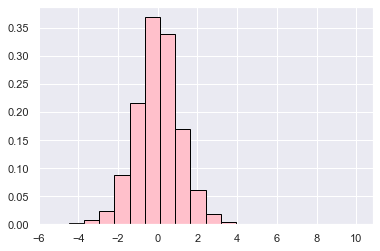

In [241]:
#generate t distribution with sample size 10000
x = t.rvs(df=9, size=10000)

#create plot of t distribution
plt.hist(x, density=True, edgecolor='black', bins=20, color='pink')

In [242]:
# convert specified column in the dataframe into series
from numpy import mean
from numpy import std

population_weight = df['weight'].squeeze()
print('mean=%.3f stdv=%.3f' % (mean(population_weight), std(population_weight)))
sample_weight = df2['weight'].squeeze()
print('mean=%.3f stdv=%.3f' % (mean(sample_weight), std(sample_weight)))

mean=180.638 stdv=27.960
mean=189.700 stdv=18.122


# 1. Normality Tests

I need to decide whether to use parametric or nonparametric statistical methods.

This section lists statistical tests that you can use to check if your data has a Gaussian distribution.

Shapiro-Wilk Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

In [243]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(population_weight)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.989, p=0.000
Probably not Gaussian


# 1 Small Sample Hypothesis Test
A test on 10 athletes who competed in the crossfit, the weight of each athlete is inspected, using alpha = 0.05.

A one-sample t-test checks whether a sample mean differs from the population mean.


In [244]:
import scipy.stats as stats
import math

In [245]:
print( population_weight.mean() )
print( sample_weight.mean() )

180.6377396569122
189.7


In [246]:
# cast population_weight and sample_weight as numeric values
population_weight = population_weight.astype(float)
sample_weight = sample_weight.astype(float)

Notice that we used a slightly different combination of distributions to generate the sample data for sample weight, so we know that the two means are different. Let's conduct a t-test at a 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the population. To conduct a one sample t-test, we can the stats.ttest_1samp() function:

In [247]:
stats.ttest_1samp(a = sample_weight,               # Sample data
                 popmean = population_weight.mean())  # Pop mean

Ttest_1sampResult(statistic=1.5002015259335348, pvalue=0.16779941438154244)

The test result shows that the test statistic "t" equals 1.5. This test statistic shows how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

> t critical is: [-2.262,2.262]

In [248]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=9)  # Degrees of freedom

-2.262157162740992

In [249]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=9)  # Degrees of freedom

2.2621571627409915


We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function:

In [250]:
stats.t.cdf(x= 1.5,      # T-test statistic
               df= 9) * 2   # Multiply by two for two tailed test *

1.8321493439429253

Notice this value is the same as the p-value listed in the original t-test output. A p-value of 1.85 means we'd expect to see data as extreme as our sample due to chance about 18.5% of the time if the null hypothesis was confirmed. In this case, the p-value is lower than our significance level α (equal to 1-conf.level or 0.05), so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample, it would not capture a population mean of 180.638

In [251]:
sigma = sample_weight.std()/math.sqrt(10)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 9,                     # Degrees of freedom
                 loc = sample_weight.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(176.0349978043897, 203.3650021956103)

On the other hand, since there is an 18.5% chance of seeing a result this extreme due to chance, it is not significant at the 99% confidence level. This means if we were to construct a 99% confidence interval, it even would not capture the population mean:

In [252]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 9,                     # Degrees of freedom
                 loc = sample_weight.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(170.06873362479675, 209.33126637520323)

# Two-Sample Independent T-Test
## + Segment data by gender and region?
Assume the 2 samples are independent. Popullation variance is unkown, but assume it is the same for both samples.

### Hypothesis Testing

Normal distribution

+ Null Hypothesis : Female athlete has the same weight as male athlete
+ Alternate Hypothesis: It different
+ Population parameters: Mean = pop_mean_male, standard deviation = pop_std_male
+ Sample parameters : Mean = sample_mean_female, standard deviation = sample_std_female

In [253]:
import statistics

# Creating different Sample from the population
male_weight = df[df.gender =='male']
female_weight = df[df.gender =='female']

print("Population Female Mean: "+str(female_weight['weight'].mean()))
weight_female_sample = female_weight.sample(frac=0.10)
sample_mean_female = weight_female_sample['weight'].mean()
print("Sample Female Mean: "+str(sample_mean_female))
sample_std_female = statistics.stdev(weight_female_sample.weight)
print("Sample Female Standard Deviation: "+str(sample_std_female))

Population Female Mean: 140.53370786516854
Sample Female Mean: 142.66666666666666
Sample Female Standard Deviation: 15.811388300841896


In [254]:
print("Population Male Mean: "+str(male_weight['weight'].mean()))
male_weight_sample = male_weight.sample(frac=0.10)
sample_mean_male = male_weight_sample['weight'].mean()
print("Sample Male Mean: "+str(sample_mean_male))
sample_std_male = statistics.stdev(male_weight_sample.weight)
print("Sample Male Standard Deviation: "+str(sample_std_male))

Population Male Mean: 189.41820418204182
Sample Male Mean: 188.5185185185185
Sample Male Standard Deviation: 20.518284528683193


In [255]:
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65
# Calculate the test statistics
zscore_test_stat = ((sample_mean_male - sample_mean_female)*math.sqrt(8916))/sample_std_female
print(zscore_test_stat)

273.8242495431332


#### Conclusion:
As the test statistics fall into the rejection region the null hypothesis is rejected
and it can be concluded that the Annual salaries increase in 2016.
However, we will first check for the Type 1 and Type 2 Errors